In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling 

import statsmodels.formula.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import  Lasso, Ridge

In [2]:
#!pip install plotnine
from plotnine import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

In [50]:
###load the dataset

waiter_data = pd.read_excel( "C:/Users/Vikas Srivastava/Desktop/case study/case study_6W/waiter case study/Case Waiter Tips.xlsx", sheet_name='Data' )

In [51]:
waiter_data.head()

,Total Bill in INR,Tip to the Waiter,Sex,Smoker,Day,Meal Type,Number of people in a table
0,1274.25,75.75,Female,No,Sun,Dinner,2.0
1,775.50,124.50,NaN,No,Sun,NaN,3.0
2,1575.75,262.50,Male,No,Sun,Dinner,3.0
3,1776.00,248.25,Male,No,Sun,Dinner,NaN
4,1844.25,270.75,Female,NaN,Sun,Dinner,4.0


In [52]:
waiter_data.columns.to_list()

['Total Bill in INR',
 'Tip to the Waiter',
 'Sex',
 'Smoker',
 'Day',
 'Meal Type',
 'Number of people in a table']

In [53]:
waiter_data.shape

(244, 7)

In [54]:
waiter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Bill in INR            233 non-null    float64
 1   Tip to the Waiter            244 non-null    float64
 2   Sex                          240 non-null    object 
 3   Smoker                       239 non-null    object 
 4   Day                          243 non-null    object 
 5   Meal Type                    239 non-null    object 
 6   Number of people in a table  232 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [55]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(waiter_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
waiter_data.head()

,Total Bill in INR,Tip to the Waiter,Sex,Smoker,Day,Meal Type,Number of people in a table
0,1274.25,75.75,Female,No,Sun,Dinner,2.0
1,775.50,124.50,NaN,No,Sun,NaN,3.0
2,1575.75,262.50,Male,No,Sun,Dinner,3.0
3,1776.00,248.25,Male,No,Sun,Dinner,NaN
4,1844.25,270.75,Female,NaN,Sun,Dinner,4.0


In [57]:
waiter_data.describe()

,Total Bill in INR,Tip to the Waiter,Number of people in a table
count,233.000000,244.000000,232.000000
mean,1481.723176,224.870902,2.556034
std,659.840022,103.772864,0.951807
min,230.250000,75.000000,1.000000
25%,1002.750000,150.000000,2.000000
50%,1336.500000,217.500000,2.000000
75%,1806.000000,267.187500,3.000000
max,3624.750000,750.000000,6.000000


In [58]:
waiter_data.dtypes

Total Bill in INR              float64
Tip to the Waiter              float64
Sex                             object
Smoker                          object
Day                             object
Meal Type                       object
Number of people in a table    float64
dtype: object

## EDA

C:\Users\Vikas Srivastava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Tip to the Waiter', ylabel='Density'>

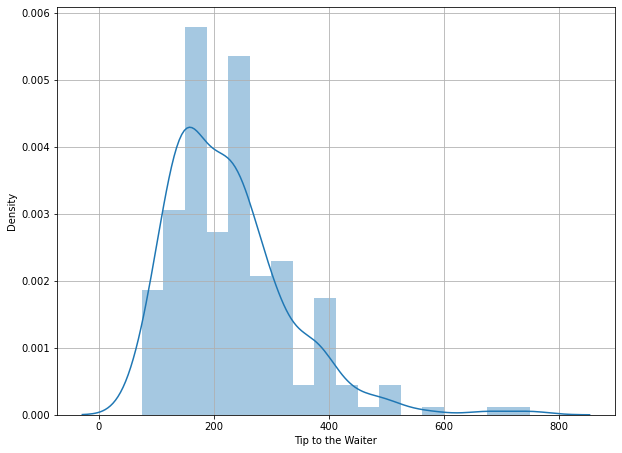

In [59]:
sns.distplot(waiter_data['Tip to the Waiter'])

C:\Users\Vikas Srivastava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Total Bill in INR', ylabel='Density'>

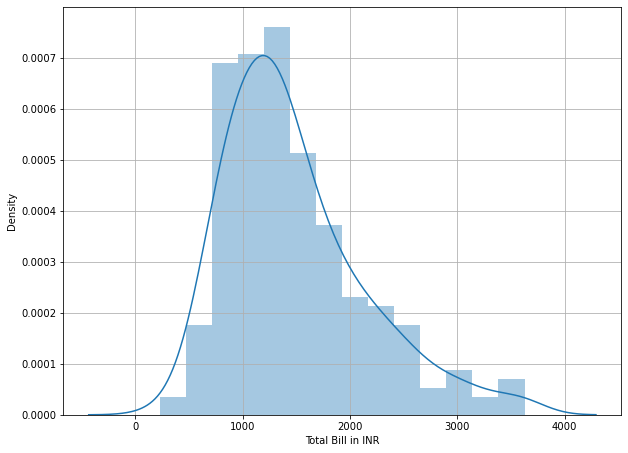

In [60]:
sns.distplot(waiter_data['Total Bill in INR'])

C:\Users\Vikas Srivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Total Bill in INR'>

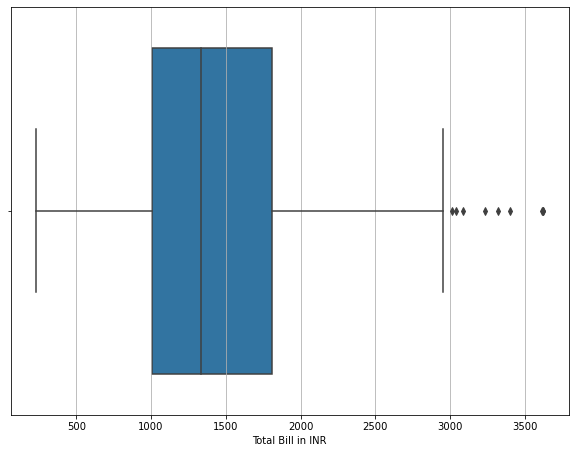

In [61]:
sns.boxplot(waiter_data['Total Bill in INR'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

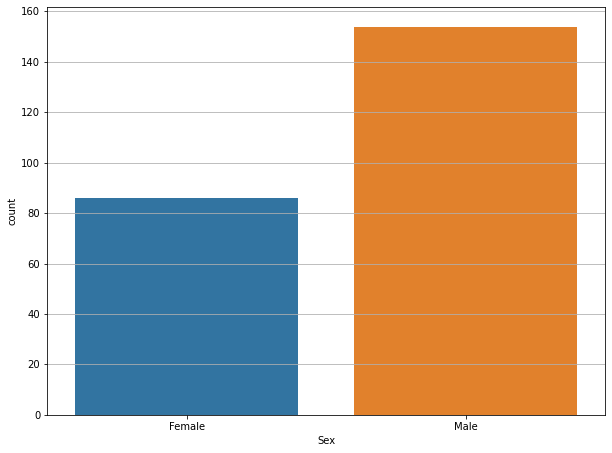

In [62]:
sns.countplot(x='Sex', data=waiter_data)

In [63]:
waiter_data['Sex'].value_counts()

Male      154
Female     86
Name: Sex, dtype: int64

In [64]:
157/244

0.6434426229508197

In [65]:
87/244

0.35655737704918034

<AxesSubplot:xlabel='Smoker', ylabel='count'>

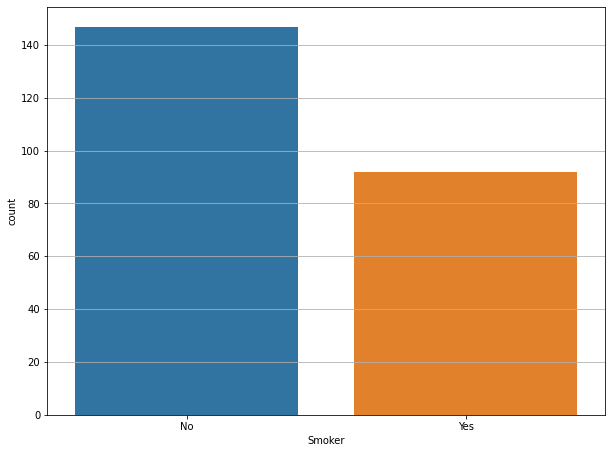

In [66]:
sns.countplot(x='Smoker', data=waiter_data)

In [67]:
waiter_data['Smoker'].value_counts()

No     147
Yes     92
Name: Smoker, dtype: int64

In [68]:
151/244

0.6188524590163934

<AxesSubplot:xlabel='Sex', ylabel='count'>

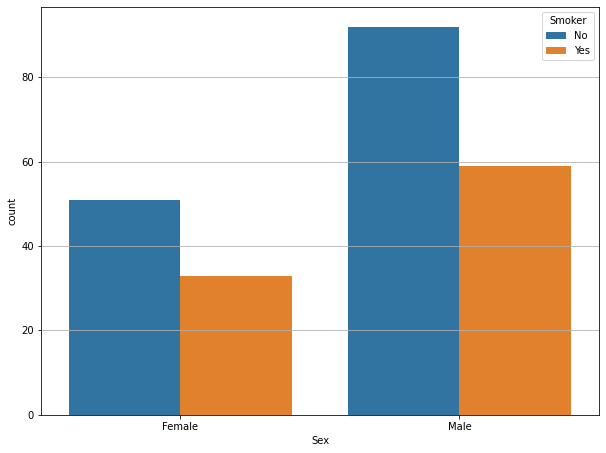

In [69]:
sns.countplot(x ='Sex', hue = "Smoker", data = waiter_data)

<AxesSubplot:xlabel='Sex', ylabel='Tip to the Waiter'>

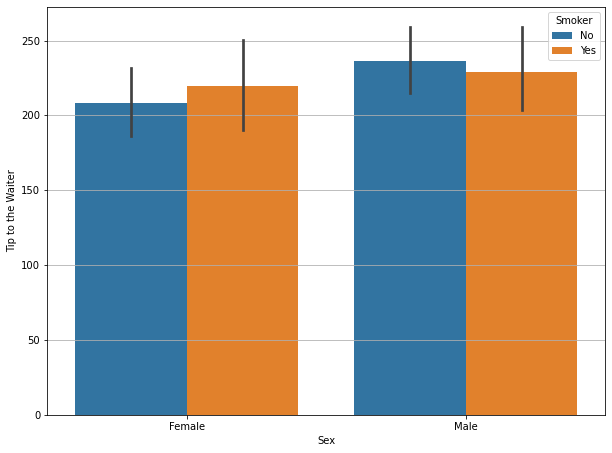

In [70]:
sns.barplot(x = 'Sex', y = 'Tip to the Waiter', hue = 'Smoker', data = waiter_data)

<AxesSubplot:xlabel='Sex', ylabel='Tip to the Waiter'>

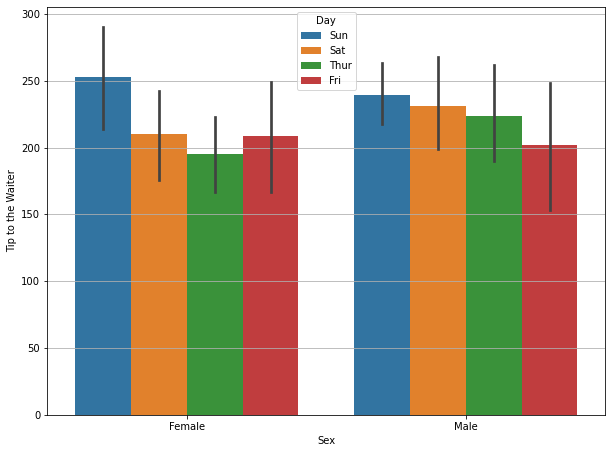

In [71]:
sns.barplot(x = 'Sex', y = 'Tip to the Waiter', hue = 'Day', data = waiter_data)

In [72]:
waiter_data.groupby('Day')['Tip to the Waiter'].agg(['mean', 'sum'])

,mean,sum
Day,,
Fri,205.105263,3897.00
Sat,224.482759,19530.00
Sun,241.390000,18104.25
Thur,207.858871,12887.25


<AxesSubplot:xlabel='Sex', ylabel='Tip to the Waiter'>

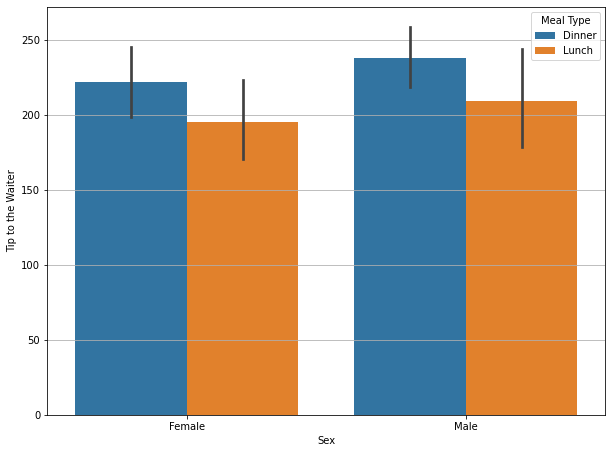

In [73]:
sns.barplot(x = 'Sex', y = 'Tip to the Waiter', hue = 'Meal Type', data = waiter_data)

<AxesSubplot:xlabel='Day', ylabel='count'>

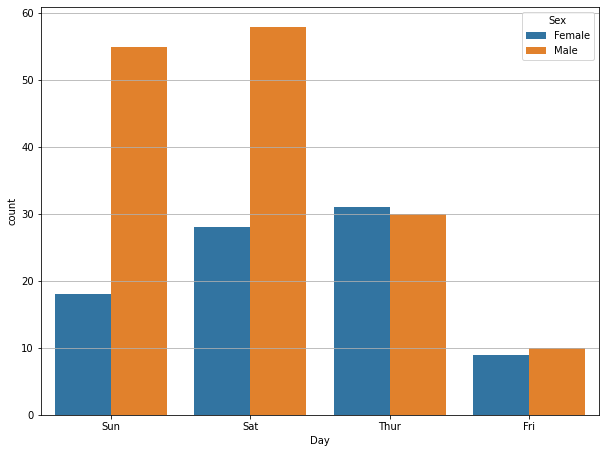

In [74]:
sns.countplot(x='Day',data=waiter_data, hue='Sex')

C:\Users\Vikas Srivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Total Bill in INR'>

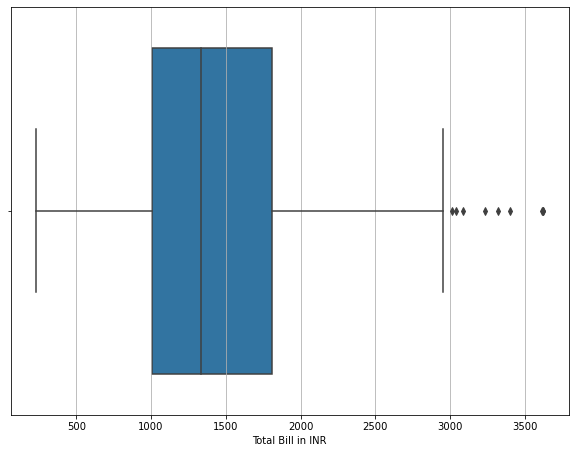

In [75]:
sns.boxplot(waiter_data['Total Bill in INR'])

C:\Users\Vikas Srivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Tip to the Waiter'>

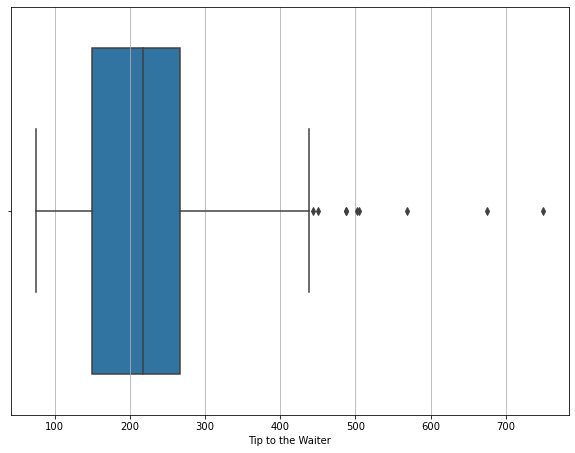

In [76]:
sns.boxplot(waiter_data['Tip to the Waiter'])

In [97]:
### seperating numerical and categorical variables

numeric_var_names=[key for key in dict(waiter_data.dtypes) if dict(waiter_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(waiter_data.dtypes) if dict(waiter_data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Total Bill in INR', 'Tip to the Waiter', 'Number of people in a table']
['Sex', 'Smoker', 'Day', 'Meal Type']


In [98]:
waiter_data_num=waiter_data[numeric_var_names]
waiter_data_num.head(5)

,Total Bill in INR,Tip to the Waiter,Number of people in a table
0,1274.25,75.75,2.0
1,775.50,124.50,3.0
2,1575.75,262.50,3.0
3,1776.00,248.25,NaN
4,1844.25,270.75,4.0


In [99]:
waiter_data_cat = waiter_data[cat_var_names]
waiter_data_cat.head(5)

,Sex,Smoker,Day,Meal Type
0,Female,No,Sun,Dinner
1,NaN,No,Sun,NaN
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,NaN,Sun,Dinner


In [100]:
#Data statistics for numerical var.
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = waiter_data_num.apply(lambda x: var_summary(x)).T

In [101]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Total Bill in INR,233.0,11.0,345241.5,1481.723176,1336.5,659.840022,435388.854611,230.25,543.75,692.85,774.9,1002.75,1336.5,1806.0000,2421.75,2852.5500,3545.0700,3624.75
Tip to the Waiter,244.0,0.0,54868.5,224.870902,217.5,103.772864,10768.807339,75.00,75.00,108.00,112.5,150.00,217.5,267.1875,375.00,389.6625,541.0875,750.00
Number of people in a table,232.0,12.0,593.0,2.556034,2.0,0.951807,0.905937,1.00,1.00,2.00,2.0,2.00,2.0,3.0000,4.00,4.0000,6.0000,6.00


In [102]:
### data statistics for categorical var.

def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary = waiter_data_cat.apply(lambda x: cat_summary(x))

In [103]:
cat_summary

,Sex,Smoker,Day,Meal Type
N,240,239,243,239
NMISS,4,5,1,5
ColumnsNames,"Male 154 Female 86 Name: Sex, dtype: ...","No 147 Yes 92 Name: Smoker, dtype: int64",Sat 87 Sun 75 Thur 62 Fri 19 Na...,"Dinner 172 Lunch 67 Name: Meal Type, d..."


In [104]:
waiter_data_num.columns

Index(['Total Bill in INR', 'Tip to the Waiter',
       'Number of people in a table'],
      dtype='object')

In [105]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

waiter_data_num=waiter_data_num.apply(lambda x: Missing_imputation(x))

In [106]:
waiter_data_num.isnull().sum()

Total Bill in INR              0
Tip to the Waiter              0
Number of people in a table    0
dtype: int64

In [107]:
waiter_data_cat = waiter_data_cat.apply(lambda x: x.fillna(x.mode))

In [108]:
waiter_data_cat.isnull().sum()

Sex          0
Smoker       0
Day          0
Meal Type    0
dtype: int64

In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

In [110]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

waiter_data_num = waiter_data_num.apply(lambda x: outlier_capping(x))

In [111]:
num_summary=waiter_data_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Total Bill in INR,244.0,0.0,360076.6650,1475.724037,1336.5,638.613448,407827.135389,543.75,543.75,716.8125,775.5,1006.5,1336.5,1797.3750,2385.6,2826.2250,3469.966350,3521.8050
Tip to the Waiter,244.0,0.0,54498.2625,223.353535,217.5,97.705771,9546.417597,75.00,75.00,108.0000,112.5,150.0,217.5,267.1875,375.0,389.6625,525.462375,541.0875
Number of people in a table,244.0,0.0,617.0000,2.528689,2.0,0.935797,0.875717,1.00,1.00,2.0000,2.0,2.0,2.0,3.0000,4.0,4.0000,6.000000,6.0000


In [112]:
waiter_data_cat.columns

Index(['Sex', 'Smoker', 'Day', 'Meal Type'], dtype='object')

In [114]:
### create dummy var.

def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df


In [115]:
data_cat=waiter_data_cat[['Sex', 'Smoker', 'Day', 'Meal Type']]

for c_feature in ['Sex', 'Smoker', 'Day', 'Meal Type']:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

In [116]:
data_cat.columns

Index(['Sex_Female', 'Sex_Male', 'Smoker_No', 'Smoker_Yes', 'Day_Fri',
       'Day_Sat', 'Day_Sun', 'Day_Thur', 'Meal Type_Dinner',
       'Meal Type_Lunch'],
      dtype='object')

In [117]:
waiter_data_new = pd.concat([waiter_data_num, data_cat], axis=1)

In [118]:
waiter_data_new.shape

(244, 13)

In [120]:
waiter_data_new.head()

,Total Bill in INR,Tip to the Waiter,Number of people in a table,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Day_Fri,Day_Sat,Day_Sun,Day_Thur,Meal Type_Dinner,Meal Type_Lunch
0,1274.25,75.75,2.0,1,0,1,0,0,0,1,0,1,0
1,775.50,124.50,3.0,0,0,1,0,0,0,1,0,0,0
2,1575.75,262.50,3.0,0,1,1,0,0,0,1,0,1,0
3,1776.00,248.25,2.0,0,1,1,0,0,0,1,0,1,0
4,1844.25,270.75,4.0,1,0,0,0,0,0,1,0,1,0


In [119]:
### checking correlation 

waiter_data_new.corr()

,Total Bill in INR,Tip to the Waiter,Number of people in a table,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Day_Fri,Day_Sat,Day_Sun,Day_Thur,Meal Type_Dinner,Meal Type_Lunch
Total Bill in INR,1.000000,0.625188,0.597513,-0.131813,0.148662,-0.047273,0.058505,-0.083641,0.027817,0.125994,-0.126752,0.180966,-0.179783
Tip to the Waiter,0.625188,1.000000,0.489243,-0.075436,0.084899,0.011119,0.000287,-0.054385,-0.023868,0.123228,-0.092750,0.129181,-0.140342
Number of people in a table,0.597513,0.489243,1.000000,-0.059409,0.068962,0.101177,-0.114451,-0.131757,-0.018287,0.165004,-0.088493,0.106476,-0.112314
Sex_Female,-0.131813,-0.075436,-0.059409,1.000000,-0.965072,-0.014225,0.010156,0.073738,-0.047712,-0.156817,0.180254,-0.181005,0.199620
Sex_Male,0.148662,0.084899,0.068962,-0.965072,1.000000,-0.013515,0.016377,-0.063137,0.054800,0.141087,-0.178157,0.194486,-0.195780
Smoker_No,-0.047273,0.011119,0.101177,-0.014225,-0.013515,1.000000,-0.957734,-0.232725,-0.147108,0.141851,0.147108,-0.103247,0.068211
Smoker_Yes,0.058505,0.000287,-0.114451,0.010156,0.016377,-0.957734,1.000000,0.247289,0.162367,-0.170054,-0.143293,0.095443,-0.061812
Day_Fri,-0.083641,-0.054385,-0.131757,0.073738,-0.063137,-0.232725,0.247289,1.000000,-0.216319,-0.193585,-0.169608,-0.046728,0.061094
Day_Sat,0.027817,-0.023868,-0.018287,-0.047712,0.054800,-0.147108,0.162367,-0.216319,1.000000,-0.495903,-0.434480,0.462867,-0.457995
Day_Sun,0.125994,0.123228,0.165004,-0.156817,0.141087,0.141851,-0.170054,-0.193585,-0.495903,1.000000,-0.388819,0.372586,-0.409862


In [121]:
### replace white spaces with '_'

waiter_data_new.columns = waiter_data_new.columns.str.replace(' ', '_')
waiter_data_new.head()

,Total_Bill_in_INR,Tip_to_the_Waiter,Number_of_people_in_a_table,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Day_Fri,Day_Sat,Day_Sun,Day_Thur,Meal_Type_Dinner,Meal_Type_Lunch
0,1274.25,75.75,2.0,1,0,1,0,0,0,1,0,1,0
1,775.50,124.50,3.0,0,0,1,0,0,0,1,0,0,0
2,1575.75,262.50,3.0,0,1,1,0,0,0,1,0,1,0
3,1776.00,248.25,2.0,0,1,1,0,0,0,1,0,1,0
4,1844.25,270.75,4.0,1,0,0,0,0,0,1,0,1,0


In [122]:
feature_columns = waiter_data_new.columns.difference( ['Tip_to_the_Waiter'] )
feature_columns

Index(['Day_Fri', 'Day_Sat', 'Day_Sun', 'Day_Thur', 'Meal_Type_Dinner',
       'Meal_Type_Lunch', 'Number_of_people_in_a_table', 'Sex_Female',
       'Sex_Male', 'Smoker_No', 'Smoker_Yes', 'Total_Bill_in_INR'],
      dtype='object')

## train test split and model building using statsmodel

In [123]:
### train test split

train, test = train_test_split( waiter_data_new,
                                test_size = 0.15,
                                random_state = 123 )

In [124]:
train.shape, test.shape

((207, 13), (37, 13))

In [125]:
train.head()

,Total_Bill_in_INR,Tip_to_the_Waiter,Number_of_people_in_a_table,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Day_Fri,Day_Sat,Day_Sun,Day_Thur,Meal_Type_Dinner,Meal_Type_Lunch
5,1896.75,353.25,4.0,0,1,1,0,0,0,1,0,1,0
4,1844.25,270.75,4.0,1,0,0,0,0,0,1,0,1,0
151,984.75,150.00,2.0,0,1,1,0,0,0,1,0,1,0
200,1403.25,300.00,3.0,0,1,0,1,0,0,0,1,0,1
234,1164.75,225.00,2.0,0,1,0,1,0,1,0,0,1,0


In [126]:
all_columns = "+".join(feature_columns)

print(all_columns)

Day_Fri+Day_Sat+Day_Sun+Day_Thur+Meal_Type_Dinner+Meal_Type_Lunch+Number_of_people_in_a_table+Sex_Female+Sex_Male+Smoker_No+Smoker_Yes+Total_Bill_in_INR


In [127]:
lm_formula = "Tip_to_the_Waiter~" + all_columns

print(lm_formula)

Tip_to_the_Waiter~Day_Fri+Day_Sat+Day_Sun+Day_Thur+Meal_Type_Dinner+Meal_Type_Lunch+Number_of_people_in_a_table+Sex_Female+Sex_Male+Smoker_No+Smoker_Yes+Total_Bill_in_INR


In [145]:
lm_formula1 = "Tip_to_the_Waiter~Day_Sat+Day_Sun+Day_Thur+Meal_Type_Lunch+Number_of_people_in_a_table+Sex_Male+Smoker_Yes+Total_Bill_in_INR"

In [146]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=lm_formula1, data=train).fit()

In [147]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tip_to_the_Waiter   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     19.30
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.46e-21
Time:                        10:27:09   Log-Likelihood:                -1191.1
No. Observations:                 207   AIC:                             2400.
Df Residuals:                     198   BIC:                             2430.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      69.5467     28.350      2.453      0.015      13.639     125.454
Day_Sat                       -29.0588     24.047     -1.208      0.228     -76.481      18.363
Day_Sun                       -15.3822     24.870     -0.618      0.537     -64.427      33.662
Day_Thur                       15.6353     29.031      0.539      0.591     -41.615      72.886
Meal_Type_Lunch               -40.7887     31.823     -1.282      0.201    -103.545      21.968
Number_of_people_in_a_table    21.7672      7.409      2.938      0.004       7.156      36.378
Sex_Male                       -0.2981     11.666     -0.026      0.980     -23.304      22.708
Smoker_Yes                      8.8034     11.959      0.736      0.463     -14.780      32.387
Total_Bill_in_INR               0.0822      0.011      7.412      0.000       0.060       0.104
==============================================================================
Omnibus:                       21.538   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.850
Skew:                           0.613   Prob(JB):                     7.36e-08
Kurtosis:                       4.519   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
pred_train = lm.predict(train)
pred_train.head(5)

5      296.941140
4      292.921185
151    178.395592
200    233.616165
234    188.327177
dtype: float64

In [149]:
print('MAE:', metrics.mean_absolute_error(train.Tip_to_the_Waiter, pred_train))
print('MSE:', metrics.mean_squared_error(train.Tip_to_the_Waiter, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.Tip_to_the_Waiter, pred_train)))
print('R-Squre:', metrics.r2_score(train.Tip_to_the_Waiter, pred_train))

MAE: 57.77232736024051
MSE: 5828.469649669012
RMSE: 76.34441465928606
R-Squre: 0.4381268211931151


In [150]:
pred = lm.predict(test)
pred.head(5)

112    354.009764
19     233.172734
187    359.403814
169    158.398745
31     240.453804
dtype: float64

In [151]:
print('MAE:', metrics.mean_absolute_error(test.Tip_to_the_Waiter, pred))
print('MSE:', metrics.mean_squared_error(test.Tip_to_the_Waiter, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.Tip_to_the_Waiter, pred)))
print('R-Squre:', metrics.r2_score(test.Tip_to_the_Waiter, pred))

MAE: 46.73671373136531
MSE: 4260.530809758446
RMSE: 65.27274170554233
R-Squre: 0.04387711404799066


In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [153]:
# get y and X dataframes based on this regression
y, X = dmatrices('Tip_to_the_Waiter~Day_Sat+Day_Sun+Day_Thur+Meal_Type_Lunch+Number_of_people_in_a_table+Sex_Male+Smoker_Yes+Total_Bill_in_INR', train, return_type='dataframe')

In [154]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [155]:
vif.round(2)

,VIF Factor,features
0,27.30,Intercept
1,4.54,Day_Sat
2,4.56,Day_Sun
3,5.10,Day_Thur
4,6.55,Meal_Type_Lunch
5,1.65,Number_of_people_in_a_table
6,1.08,Sex_Male
7,1.16,Smoker_Yes
8,1.65,Total_Bill_in_INR


In [156]:
###based on p-value and vif, dropping 'Meal_Type_Lunch'

lm_1 = smf.ols('Tip_to_the_Waiter~Day_Sat+Day_Sun+Day_Thur+Number_of_people_in_a_table+Sex_Male+Smoker_Yes+Total_Bill_in_INR', data=train).fit()

In [157]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tip_to_the_Waiter   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     21.75
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.11e-21
Time:                        10:28:11   Log-Likelihood:                -1192.0
No. Observations:                 207   AIC:                             2400.
Df Residuals:                     199   BIC:                             2427.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      53.5788     25.507      2.101      0.037       3.279     103.878
Day_Sat                       -13.9672     21.001     -0.665      0.507     -55.381      27.447
Day_Sun                        -0.4687     22.016     -0.021      0.983     -43.883      42.946
Day_Thur                       -8.2081     22.324     -0.368      0.714     -52.230      35.814
Number_of_people_in_a_table    20.9845      7.396      2.837      0.005       6.400      35.569
Sex_Male                        0.0904     11.681      0.008      0.994     -22.944      23.125
Smoker_Yes                      7.4221     11.929      0.622      0.535     -16.102      30.946
Total_Bill_in_INR               0.0844      0.011      7.677      0.000       0.063       0.106
==============================================================================
Omnibus:                       23.430   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.200
Skew:                           0.644   Prob(JB):                     8.36e-09
Kurtosis:                       4.629   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
# get y and X dataframes based on this regression
y, X = dmatrices('Tip_to_the_Waiter~Day_Sat+Day_Sun+Day_Thur+Number_of_people_in_a_table+Sex_Male+Smoker_Yes+Total_Bill_in_INR', train, return_type='dataframe')

In [159]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,22.03,Intercept
1,3.45,Day_Sat
2,3.56,Day_Sun
3,3.01,Day_Thur
4,1.64,Number_of_people_in_a_table
5,1.08,Sex_Male
6,1.15,Smoker_Yes
7,1.61,Total_Bill_in_INR


In [160]:
###based on p-value and vif, dropping 'Day_Sun'

lm_2 = smf.ols('Tip_to_the_Waiter~Day_Sat+Day_Thur+Number_of_people_in_a_table+Sex_Male+Smoker_Yes+Total_Bill_in_INR', data=train).fit()

In [161]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tip_to_the_Waiter   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     25.50
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.09e-22
Time:                        10:29:09   Log-Likelihood:                -1192.0
No. Observations:                 207   AIC:                             2398.
Df Residuals:                     200   BIC:                             2421.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      53.2409     19.919      2.673      0.008      13.963      92.519
Day_Sat                       -13.6093     12.554     -1.084      0.280     -38.365      11.147
Day_Thur                       -7.8460     14.425     -0.544      0.587     -36.290      20.598
Number_of_people_in_a_table    20.9768      7.369      2.847      0.005       6.447      35.507
Sex_Male                        0.0634     11.583      0.005      0.996     -22.777      22.904
Smoker_Yes                      7.4926     11.432      0.655      0.513     -15.050      30.035
Total_Bill_in_INR               0.0844      0.011      7.705      0.000       0.063       0.106
==============================================================================
Omnibus:                       23.388   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.115
Skew:                           0.643   Prob(JB):                     8.72e-09
Kurtosis:                       4.627   Cond. No.                     6.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
# get y and X dataframes based on this regression
y, X = dmatrices('Tip_to_the_Waiter~Day_Sat+Day_Sun+Number_of_people_in_a_table+Sex_Male+Smoker_Yes+Total_Bill_in_INR', train, return_type='dataframe')

In [163]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,12.12,Intercept
1,1.44,Day_Sat
2,1.50,Day_Sun
3,1.64,Number_of_people_in_a_table
4,1.08,Sex_Male
5,1.09,Smoker_Yes
6,1.61,Total_Bill_in_INR


In [164]:
###based on p-value, dropping 'Sex_Male'

lm_3 = smf.ols('Tip_to_the_Waiter~Day_Sat+Day_Sun+Number_of_people_in_a_table+Smoker_Yes+Total_Bill_in_INR', data=train).fit()

In [165]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tip_to_the_Waiter   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.80e-23
Time:                        10:29:29   Log-Likelihood:                -1192.0
No. Observations:                 207   AIC:                             2396.
Df Residuals:                     201   BIC:                             2416.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      47.3685     18.444      2.568      0.011      10.999      83.738
Day_Sat                        -8.0142     13.236     -0.605      0.546     -34.114      18.085
Day_Sun                         5.7617     13.877      0.415      0.678     -21.602      33.125
Number_of_people_in_a_table    20.9691      7.360      2.849      0.005       6.457      35.481
Smoker_Yes                      8.4851     11.521      0.736      0.462     -14.233      31.203
Total_Bill_in_INR               0.0843      0.011      7.727      0.000       0.063       0.106
==============================================================================
Omnibus:                       22.938   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.124
Skew:                           0.635   Prob(JB):                     1.43e-08
Kurtosis:                       4.605   Cond. No.                     6.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
# get y and X dataframes based on this regression
y, X = dmatrices('Tip_to_the_Waiter~Day_Sat+Day_Sun+Number_of_people_in_a_table+Smoker_Yes+Total_Bill_in_INR', train, return_type='dataframe')

In [167]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,11.63,Intercept
1,1.38,Day_Sat
2,1.43,Day_Sun
3,1.64,Number_of_people_in_a_table
4,1.09,Smoker_Yes
5,1.60,Total_Bill_in_INR


In [168]:
pred3 = lm_3.predict(test)
pred3.head(5)

112    356.619604
19     232.758669
187    358.951735
169    156.953595
31     239.192990
dtype: float64

In [169]:
print('MAE:', metrics.mean_absolute_error(test.Tip_to_the_Waiter, pred3))
print('MSE:', metrics.mean_squared_error(test.Tip_to_the_Waiter, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.Tip_to_the_Waiter, pred3)))
print('R-Squre:', metrics.r2_score(test.Tip_to_the_Waiter, pred3))

MAE: 46.991610118826735
MSE: 4278.416895976999
RMSE: 65.40960859061151
R-Squre: 0.03986322537137321


## using sklearn and model cross validation

In [170]:
train_X, test_X, train_y, test_y = train_test_split( waiter_data_new[feature_columns],
                                                  waiter_data_new['Tip_to_the_Waiter'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

In [171]:
linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression()

In [172]:
linreg.score(train_X,train_y)

0.43571772115169516

In [173]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print('lm_Train_RMSE:', rmse_t)
print('lm_Train_R2:', metrics.r2_score( train_y, y_pred_t ))

y_pred_test = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred_test ) )
print('lm_Test_RMSE: ',rmse)
print('lm_Test_R2: ',metrics.r2_score( test_y, y_pred_test ))

lm_Train_RMSE: 77.45739307054482
lm_Train_R2: 0.43571772115169516
lm_Test_RMSE:  60.88987712451033
lm_Test_R2:  0.2574115773276765


In [174]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [175]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 5 )

array([ 0.31321175,  0.19596957,  0.30068827, -0.30551118,  0.32395757])

In [176]:
print('Cross_val_R2: ',round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 5 ) ), 2 ))

Cross_val_R2:  0.17


### Decision Tree Model

In [179]:
waiter_data_new.head()

,Total_Bill_in_INR,Tip_to_the_Waiter,Number_of_people_in_a_table,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Day_Fri,Day_Sat,Day_Sun,Day_Thur,Meal_Type_Dinner,Meal_Type_Lunch
0,1274.25,75.75,2.0,1,0,1,0,0,0,1,0,1,0
1,775.50,124.50,3.0,0,0,1,0,0,0,1,0,0,0
2,1575.75,262.50,3.0,0,1,1,0,0,0,1,0,1,0
3,1776.00,248.25,2.0,0,1,1,0,0,0,1,0,1,0
4,1844.25,270.75,4.0,1,0,0,0,0,0,1,0,1,0


In [181]:
from sklearn.tree import DecisionTreeRegressor

In [182]:
dt_reg = DecisionTreeRegressor(random_state=0)

In [183]:
dt_reg.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [184]:
print('Decision Tree results : ')

y_pred_t = dt_reg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print('dt_Train_RMSE:', rmse_t)
print('dt_Train_R2:', metrics.r2_score( train_y, y_pred_t ))

y_pred_test = dt_reg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred_test ) )
print('dt_Test_RMSE: ',rmse)
print('dt_Test_R2: ',metrics.r2_score( test_y, y_pred_test ))

Decision Tree results : 
dt_Train_RMSE: 2.9398789466836495
dt_Train_R2: 0.999187114165436
dt_Test_RMSE:  75.93942268918921
dt_Test_R2:  -0.15502812956680811


In [188]:
# Hyper parameters range intialization for tuning 

params_grid ={"max_depth" : [5,7,9,10,12,14],
               "min_samples_leaf" : range(2,10),
               "max_features" : ["auto","log2","sqrt"],
               "min_samples_split" : [4,8,10,12,15,18,20],
               "max_leaf_nodes" : range(4,21) }

dt_estimator = RandomizedSearchCV(DecisionTreeRegressor(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1)

dt_estimator.fit(train_X,train_y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 10, 12, 14],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'max_leaf_nodes': range(4, 21),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18, 20]},
                   random_state=0)

In [189]:
dt_estimator.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 7,
 'max_leaf_nodes': 15,
 'max_features': 'auto',
 'max_depth': 10}

In [190]:
dt_reg_1 = dt_estimator.best_estimator_

In [191]:
print('Decision Tree results after hyper_param_tuning1 : ')

y_pred_t = dt_reg_1.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print('dt_Train_RMSE:', rmse_t)
print('dt_Train_R2:', metrics.r2_score( train_y, y_pred_t ))

y_pred_test = dt_reg_1.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred_test ) )
print('dt_Test_RMSE: ',rmse)
print('dt_Test_R2: ',metrics.r2_score( test_y, y_pred_test ))

Decision Tree results after hyper_param_tuning1 : 
dt_Train_RMSE: 66.74064239792132
dt_Train_R2: 0.5810603897223018
dt_Test_RMSE:  51.584152335272876
dt_Test_R2:  0.4670449577201343


In [193]:
cv_scores = cross_val_score( dt_reg_1, train_X, train_y, cv = 10 )

In [195]:
cv_scores.mean() , cv_scores

(0.33884338890643545,
 array([ 0.49082186,  0.38765121,  0.54547201,  0.48222832, -0.08944228,
         0.20751821, -0.00944309,  0.65520859,  0.47077496,  0.24764409]))

### Rnadom Forest Model

In [196]:
from sklearn.ensemble import RandomForestRegressor

In [197]:
rf_reg = RandomForestRegressor(n_estimators=200,  random_state=0)

In [198]:
rf_reg.fit(train_X , train_y)  

y_pred_train = rf_reg.predict(train_X)

print("RF results without tuning :")

print('Root Mean Squared Error (RMSE) for train data:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_train)))
print('R2 for train data:',metrics.r2_score(train_y, y_pred_train))

y_pred_test = rf_reg.predict(test_X)
print('Root Mean Squared Error (RMSE) for test data:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_test)))
print('R2 for test data :',metrics.r2_score(test_y, y_pred_test))

RF results without tuning :
Root Mean Squared Error (RMSE) for train data: 30.430907365125595
R2 for train data: 0.9129035480946266
Root Mean Squared Error (RMSE) for test data: 56.0844906022695
R2 for test data : 0.3699956645589857


In [199]:
tree_grid = {'n_estimators': [100,200,400,450,500,550,600,800],
            'max_depth': range(6,13),  ## if high may lead to overfitting
            'max_features' : ['auto', 'sqrt', 'log2'],
             'min_samples_leaf' : range(4,12),  ### if too low, lead to overfitting
            'min_samples_split': [8,10,12,14,16]   ###By increasing the value of the min_sample_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting
            }

rf_estimator= RandomizedSearchCV(estimator = RandomForestRegressor(random_state=0), param_distributions =tree_grid, 
                         verbose=1,cv=10,random_state=0,n_jobs=-1)

rf_estimator.fit(train_X , train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(6, 13),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(4, 12),
                                        'min_samples_split': [8, 10, 12, 14,
                                                              16],
                                        'n_estimators': [100, 200, 400, 450,
                                                         500, 550, 600, 800]},
                   random_state=0, verbose=1)

In [200]:
rf_estimator.best_params_

{'n_estimators': 450,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 11}

In [202]:
rf_reg_estimator2 = rf_estimator.best_estimator_

y_est_pred_train2 = rf_reg_estimator2.predict(train_X)

print("RF results after hyper_params_tuning1 :")

print('Root Mean Squared Error (RMSE) for train data:', np.sqrt(metrics.mean_squared_error(train_y, y_est_pred_train2)))
print('R2 for train data:',metrics.r2_score(train_y, y_est_pred_train2))

y_est_pred_test2 = rf_reg_estimator2.predict(test_X)
print('Root Mean Squared Error (RMSE) for test data:', np.sqrt(metrics.mean_squared_error(test_y, y_est_pred_test2)))
print('R2 for test data :',metrics.r2_score(test_y, y_est_pred_test2))

RF results after hyper_params_tuning1 :
Root Mean Squared Error (RMSE) for train data: 63.68826331843227
R2 for train data: 0.6185044536633986
Root Mean Squared Error (RMSE) for test data: 51.55078974161169
R2 for test data : 0.46773412335581444


In [203]:
tree_grid = {'n_estimators': [100,200,400,450,500,550,600,800],
            'max_depth': range(6,10),  ## if high may lead to overfitting
            'max_features' : ['auto', 'sqrt', 'log2'],
             'min_samples_leaf' : range(4,12),  ### if too low, lead to overfitting
            'min_samples_split': [8,10,12,14,16]   ###By increasing the value of the min_sample_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting
            }

rf_estimator= RandomizedSearchCV(estimator = RandomForestRegressor(random_state=0), param_distributions =tree_grid, 
                         verbose=1,cv=10,random_state=0,n_jobs=-1)

rf_estimator.fit(train_X , train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(6, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(4, 12),
                                        'min_samples_split': [8, 10, 12, 14,
                                                              16],
                                        'n_estimators': [100, 200, 400, 450,
                                                         500, 550, 600, 800]},
                   random_state=0, verbose=1)

In [204]:
rf_reg_estimator3 = rf_estimator.best_estimator_

y_est_pred_train3 = rf_reg_estimator3.predict(train_X)

print("RF results after hyper_params_tuning1 :")

print('Root Mean Squared Error (RMSE) for train data:', np.sqrt(metrics.mean_squared_error(train_y, y_est_pred_train3)))
print('R2 for train data:',metrics.r2_score(train_y, y_est_pred_train3))

y_est_pred_test3 = rf_reg_estimator3.predict(test_X)
print('Root Mean Squared Error (RMSE) for test data:', np.sqrt(metrics.mean_squared_error(test_y, y_est_pred_test3)))
print('R2 for test data :',metrics.r2_score(test_y, y_est_pred_test3))

RF results after hyper_params_tuning1 :
Root Mean Squared Error (RMSE) for train data: 66.69270525773342
R2 for train data: 0.5816619888014187
Root Mean Squared Error (RMSE) for test data: 51.21343005464284
R2 for test data : 0.4746778576369204


In [213]:
tree_grid = {'n_estimators': [100,200,400,450,500,550,600,800],
            'max_depth': range(6,12),  ## if high may lead to overfitting
            'max_features' : ['auto', 'sqrt', 'log2'],
             'min_samples_leaf' : range(6,16),  ### if too low, lead to overfitting
            'min_samples_split': [8,10,12,14]   ###By increasing the value of the min_sample_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting
            }

rf_estimator= RandomizedSearchCV(estimator = RandomForestRegressor(random_state=0), param_distributions =tree_grid, 
                         verbose=1,cv=10,random_state=0,n_jobs=-1)

rf_estimator.fit(train_X , train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(6, 12),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(6, 16),
                                        'min_samples_split': [8, 10, 12, 14],
                                        'n_estimators': [100, 200, 400, 450,
                                                         500, 550, 600, 800]},
                   random_state=0, verbose=1)

In [214]:
rf_reg_estimator4 = rf_estimator.best_estimator_

y_est_pred_train4 = rf_reg_estimator4.predict(train_X)

print("RF results after hyper_params_tuning1 :")

print('Root Mean Squared Error (RMSE) for train data:', np.sqrt(metrics.mean_squared_error(train_y, y_est_pred_train4)))
print('R2 for train data:',metrics.r2_score(train_y, y_est_pred_train4))

y_est_pred_test4 = rf_reg_estimator4.predict(test_X)
print('Root Mean Squared Error (RMSE) for test data:', np.sqrt(metrics.mean_squared_error(test_y, y_est_pred_test4)))
print('R2 for test data :',metrics.r2_score(test_y, y_est_pred_test4))

RF results after hyper_params_tuning1 :
Root Mean Squared Error (RMSE) for train data: 67.35402744680952
R2 for train data: 0.5733244093255166
Root Mean Squared Error (RMSE) for test data: 52.82449738312044
R2 for test data : 0.44110692850822775
